### J-Term 2017, Harvard GSD :
### Introduction to Data Science for Building Simulation
***
Instructor: Jung Min Han, elliehan07@gmail.com <br>
Teaching Assistant: NJ Namju Lee, nj.namju@gmail.com <br>
Date/Time: Jan 9-12/ 1:00 - 3:00 p.m. <br>
Location: 20 Sumner/Room 1-D<br>
***

# Data Plot

In [6]:
import pandas as pd
import numpy as np
import os
import datetime
from dateutil.parser import parse
import matplotlib
import matplotlib.pyplot as plt
from __future__ import print_function
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import MONDAY
from matplotlib.finance import quotes_historical_yahoo_ochl
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter

### 1. load EPW Data

In [7]:
def getPandasFromFile(path, fileName, theSkipRow):
    path = os.path.join(path , fileName)
    return pd.read_csv(path, skiprows= theSkipRow , header=None)
def SavePandasToCSV(d, path):
    d.to_csv(path)
    return "done!!"
def getPandasFromFile_my(path, fileName):
    path = os.path.join(path , fileName)
    return path 

In [8]:
d = getPandasFromFile("data",'USA_MA_Boston-Logan.Intl.AP.725090_TMY3.epw', 8)
theDf =d.rename(index=str, columns={0:"year", 1: "Month", 2: "Day", 3:"Hour",4:"Minute",6:"DB_temp",
                                     7:"Dew_Point",
                                     8:"RH",9:"P", 10:"Horiz_Rad",11:"Normal_Rad",12:"Sky_Rad",
                                     13:"G_Horiz_Rad",14:"Dir_Normal_Rad",15:"Diff_Horiz_Rad",
                                     16:"G_Horiz_Illu",17:"Dir_Normal_Illu",18:"Diff_Horiz_Illu",
                                     19:"Zenith_Illu",20:"Wind_Direction",21:"Wind_Speed",
                                     22:"Total_Sky_Cov",23:"Opaque_Sky_Cov",24:"Visibility",
                                     25:"field_Ceiling_H",26:"Whtr_Observ",27:"Whtr_Codes",
                                     28:"Pred_Water",29:"AeroesOptical_D",30:"Snow_Depth",
                                     31:"Days_Since_Snow"
                                    })

In [9]:
theDf.head(3)

,year,Month,Day,Hour,Minute,5,DB_temp,Dew_Point,RH,P,...,field_Ceiling_H,Whtr_Observ,Whtr_Codes,Pred_Water,AeroesOptical_D,Snow_Depth,Days_Since_Snow,32,33,34
0,1976,1,1,1,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9?9?9?9?9*9*9*9...,1.7,-3.9,67,100900,...,3960,9,999999999,89,0.089,0,88,999.0,999.0,99.0
1,1976,1,1,2,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9?9?9?9?9*9*9*9...,1.7,-3.9,67,100800,...,3960,9,999999999,89,0.089,0,88,999.0,999.0,99.0
2,1976,1,1,3,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9?9?9?9?9*9*9*9...,1.1,-3.9,70,100800,...,3960,9,999999999,89,0.089,0,88,999.0,999.0,99.0


### 2. Data Visualization 

In [10]:
def VisLinePlot(xData, color = "purple", title = 'title', YLable="YLable" , path="", axLine1 = 0, axLine2 = 0 ):
    plt.figure(figsize=(20,10))
    yTime = pd.date_range('1/1/2016', periods=8760, freq='H')
    plt.plot(yTime,xData, alpha=0.5, color=color)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(YLable)
    plt.legend(loc='best')
    if(axLine1 != 0 and axLine2 != 0 ):
        plt.axhline(axLine1, color='r', label=r'True $\beta_1$')
        plt.axhline(axLine2, color='r', label=r'True $\beta_1$')
        plt.axhspan(axLine1, axLine2, facecolor='0.5', alpha=0.5,label=r'True $\beta_1$')
    if path != "":
        plt.savefig(path)
    plt.tight_layout()
    plt.show()
    return plt

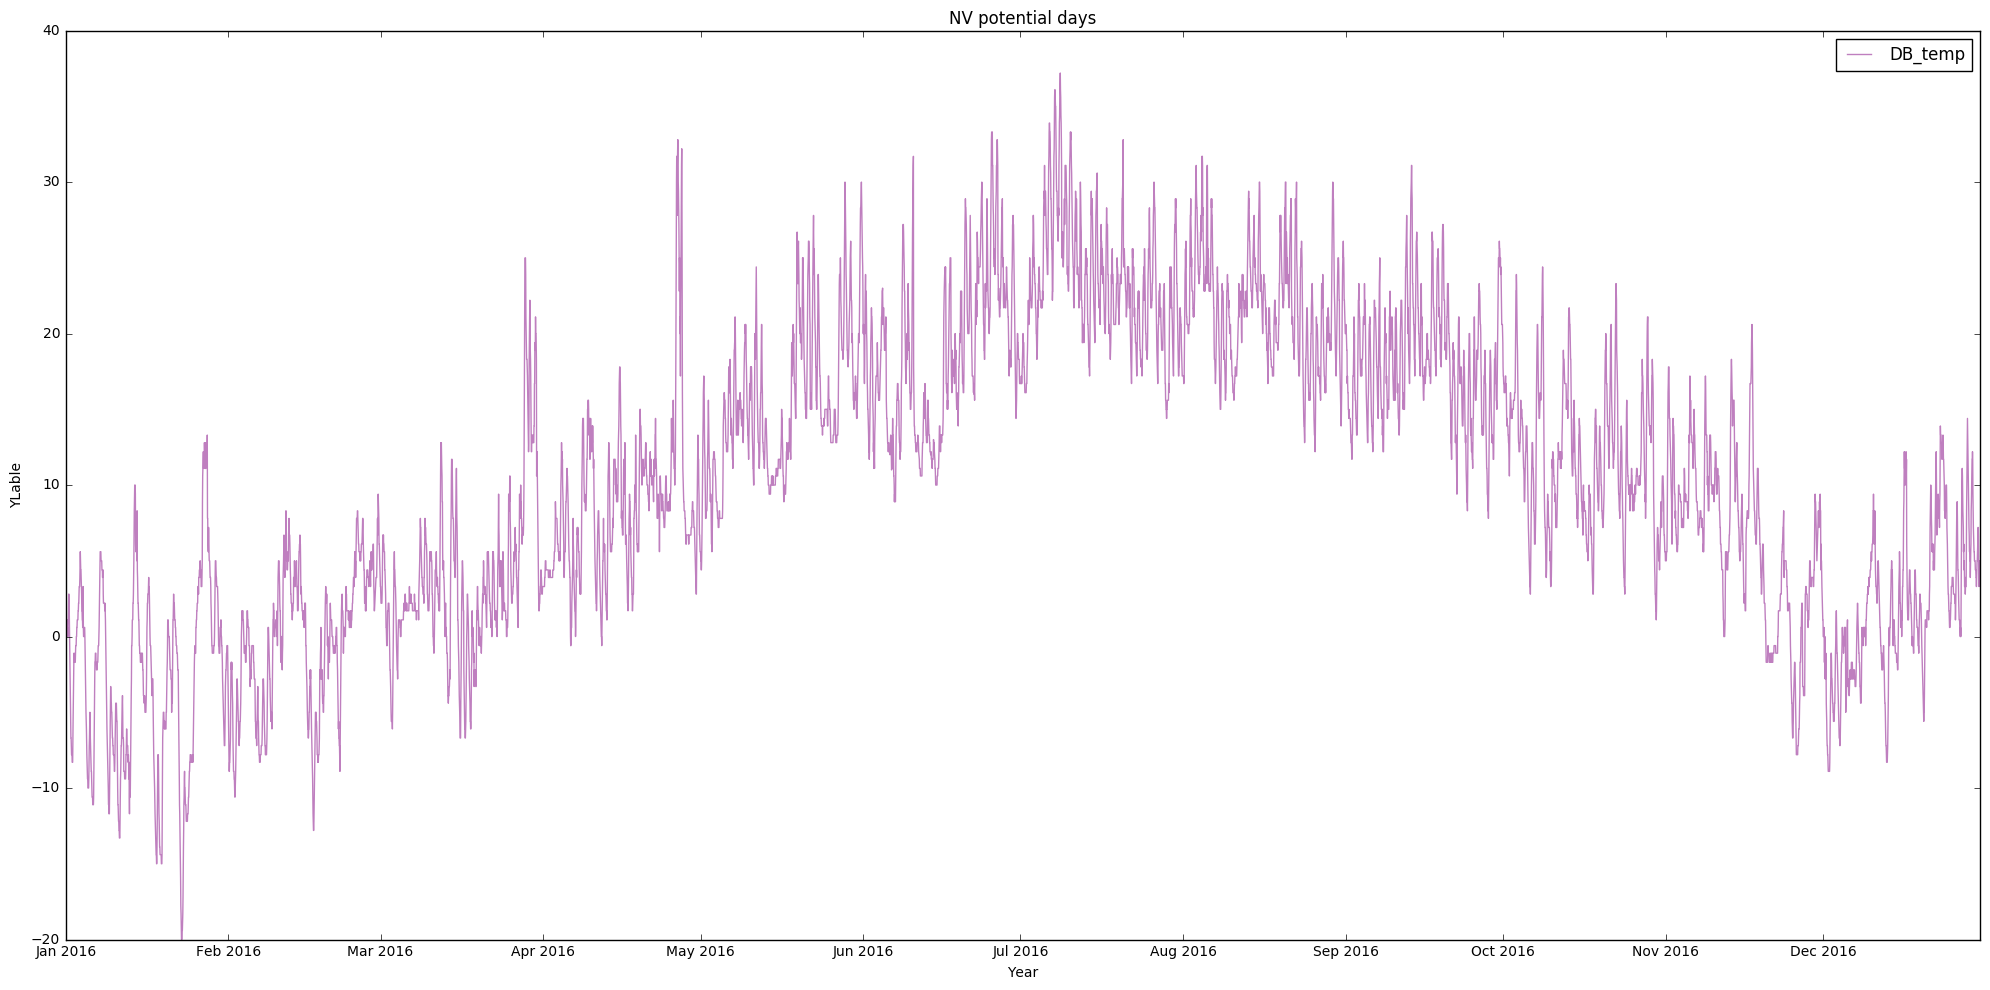

In [17]:
xData = theDf["DB_temp"]
title = 'NV potential days'
thePlt = VisLinePlot(xData,title=title, axLine1 = 0, axLine2 = 0, path="img/DB.png")

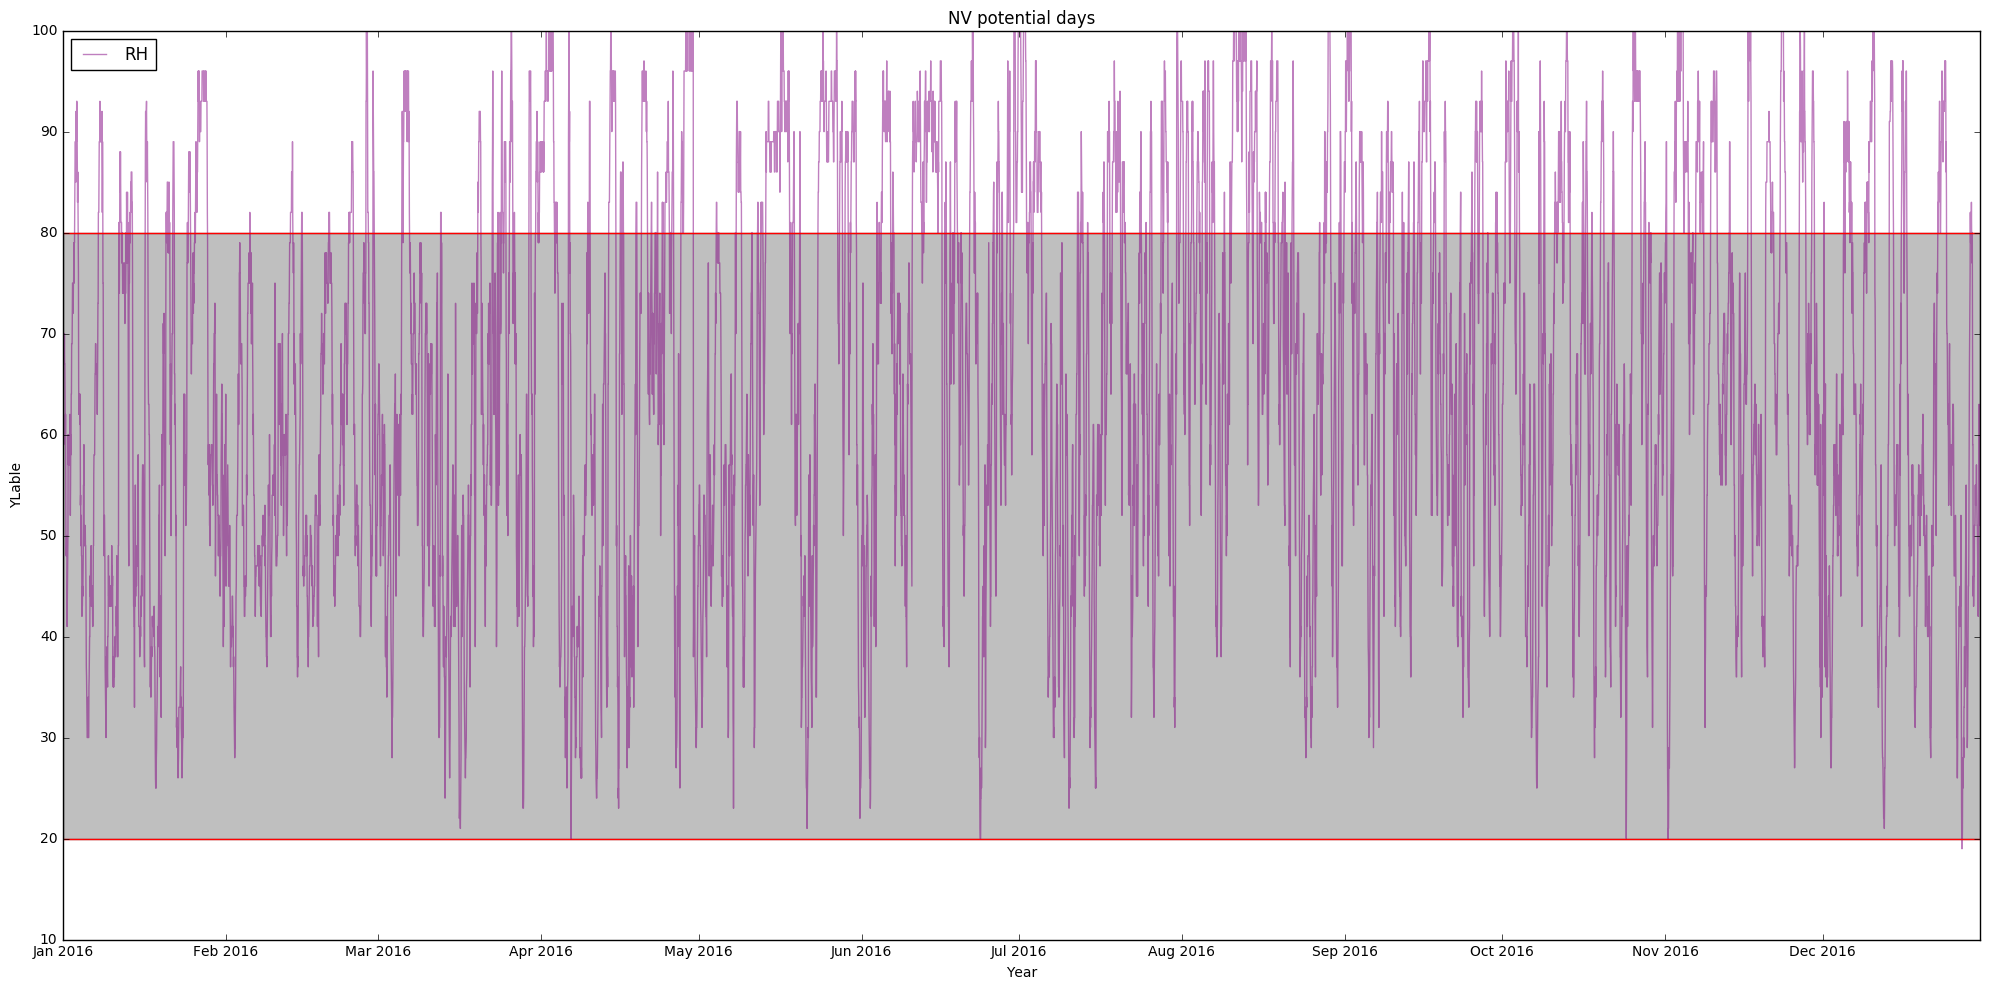

In [18]:
xData = theDf["RH"]
title = 'NV potential days'
thePlt = VisLinePlot(xData, title=title, axLine1 = 20, axLine2 = 80, path="img/RH.png")

In [21]:
def VisScatterPlot(xData, color = 'blue', title = 'title', YLable="YLable" , path="", axLine1 = 0, axLine2 = 0 ):
    plt.figure(figsize=(20,10))
    yTime = pd.date_range('1/1/2016', periods=8760, freq='H')
    plt.scatter(yTime,xData, alpha=0.2, color=color)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(YLable)
    plt.legend(loc='best')
    if(axLine1 != 0 and axLine2 != 0 ):
        plt.axhline(axLine1, color='r', label=r'True $\beta_1$')
        plt.axhline(axLine2, color='r', label=r'True $\beta_1$')
        plt.axhspan(axLine1, axLine2, facecolor='0.5', alpha=0.5,label=r'True $\beta_1$')
    if path != "":
        plt.savefig(path)
    plt.tight_layout()
    plt.show()
    return plt

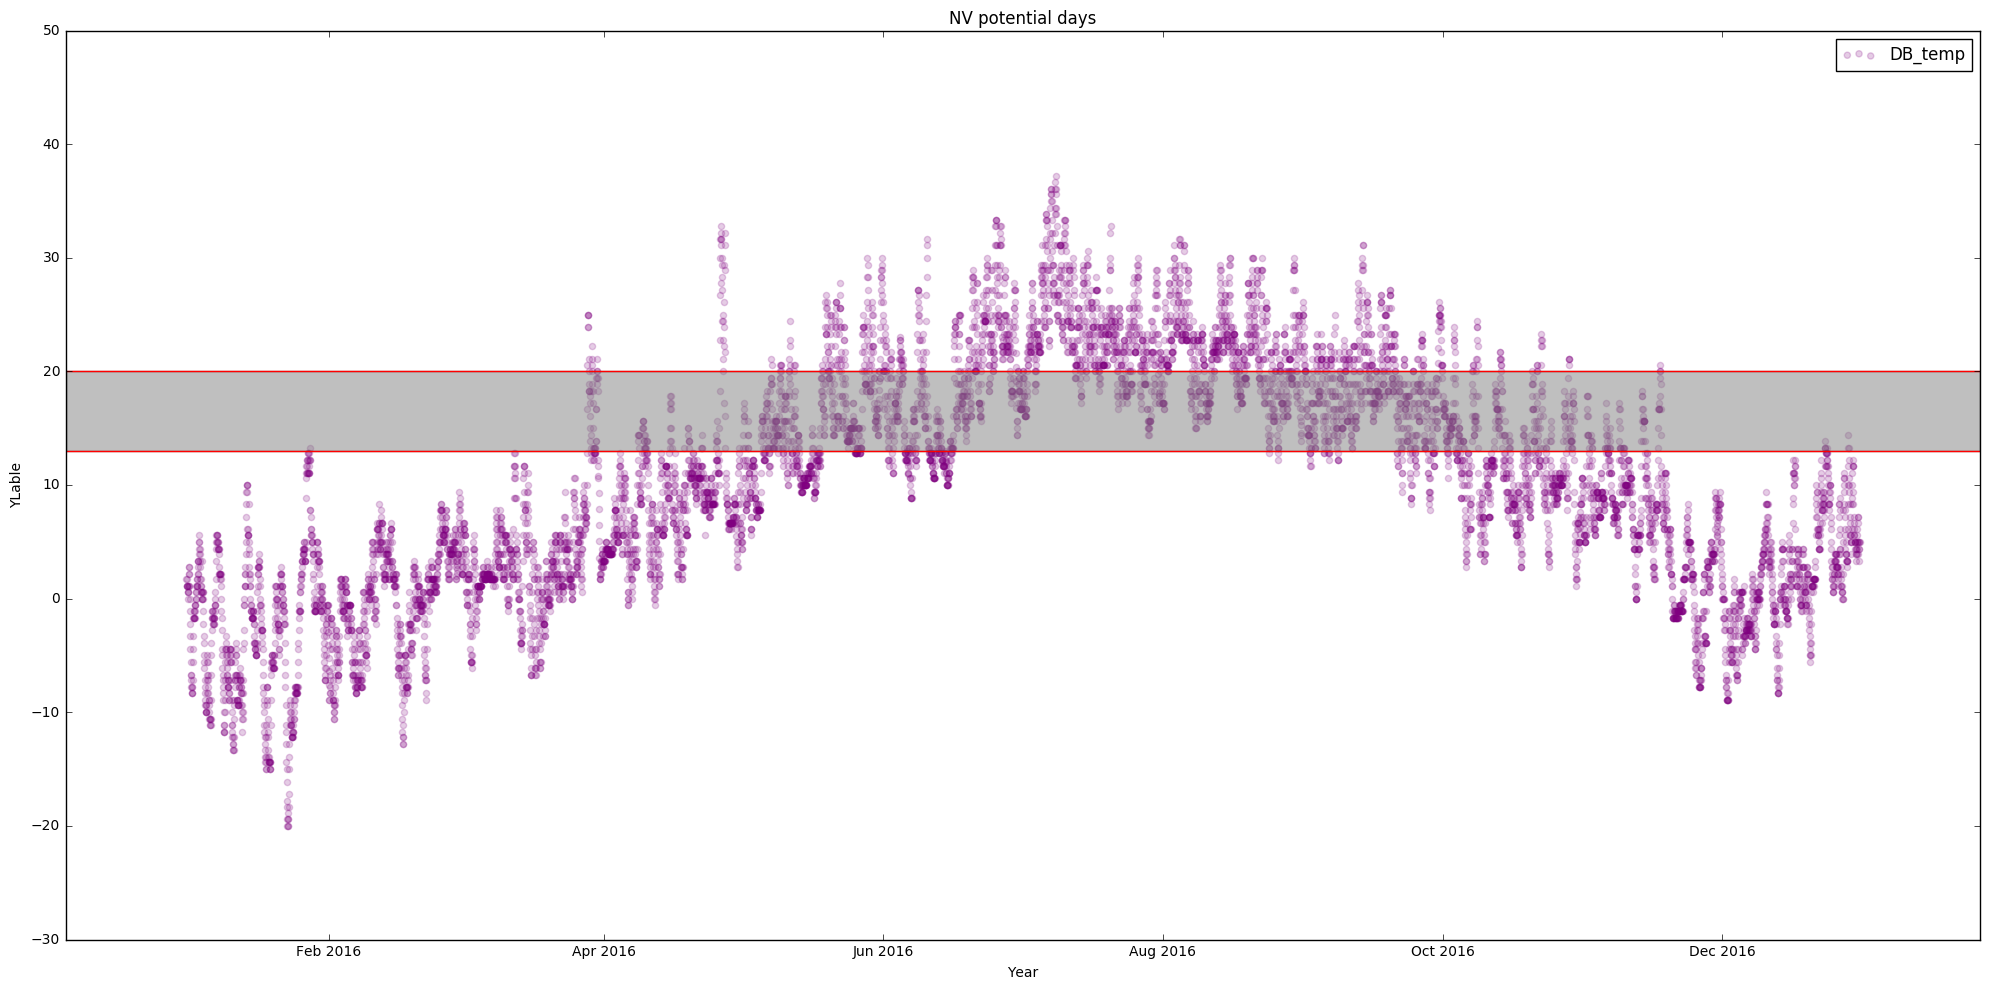

In [22]:
xData = theDf["DB_temp"]
title = 'NV potential days'
thePlt = VisScatterPlot(xData, color = "purple", title=title, axLine1 = 13, axLine2 = 20, path="img/DBScatter.png")

In [23]:
def VisPlotHist(data, theBin=100, title="title", x_label="x", y_label="y", color="purple", path=""):
    plt.hist(data,theBin, 
         normed=1, 
         facecolor=color, 
         alpha=0.5)
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if path != "":
        plt.savefig(path)
    plt.tight_layout()
    plt.show()
#     return axes

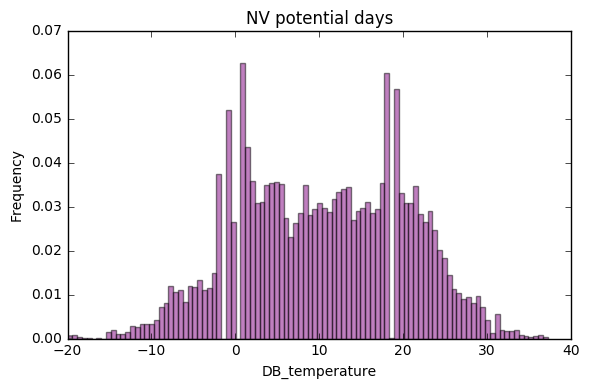

In [26]:
xData = theDf["DB_temp"]
title = 'NV potential days'
VisPlotHist(xData, theBin=100, title=title,x_label="DB_temperature", y_label="Frequency", path="img/DBHist.png")

In [27]:
from mpl_toolkits.mplot3d import Axes3D
def VisScatter3D(x,y,z, title="title", color="purple",xLabel="xLabel", yLabel="yLabel", zLabel="zLabel",  path=""): # from HW 00
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(x, y, z, color=color, alpha=0.5)
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    ax.set_zlabel(zLabel)
    plt.title(title)
    if path != "":
        plt.savefig(path)
    plt.tight_layout()
    plt.show()

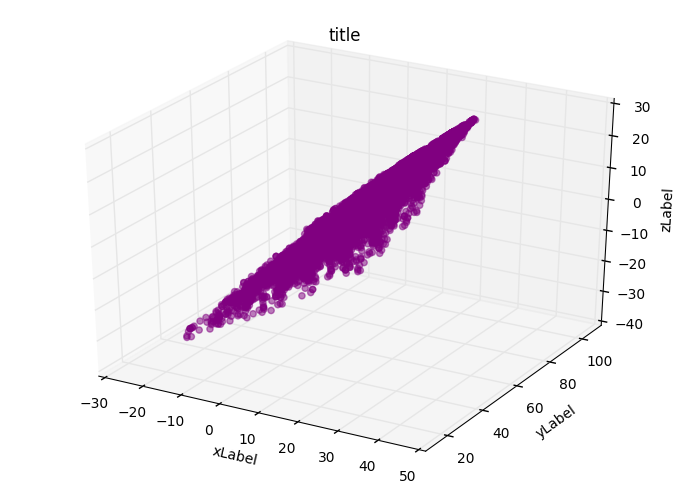

In [84]:
xData = theDf["DB_temp"]
yData = theDf["RH"]
zData = theDf["Dew_Point"]
title = 'NV potential days'
# print theDf["DB_temp"]
VisScatter3D(xData,yData,zData)

In [28]:
def VisBarPlotByAX(ax, xData, color = "purple", title = 'title', YLable="YLable" , path="", axLine1 = 0, axLine2 = 0 ):
    yTime = pd.date_range('1/1/2016', periods=8760, freq='H')
    ax.bar(yTime,xData, alpha=0.1, color=color)
    ax.set_title(title)
    ax.set_xlabel('Year')
    ax.set_ylabel(YLable)
    ax.legend(loc='best')
    if(axLine1 != 0 and axLine2 != 0 ):
        ax.set_axhline(axLine1, color='r', label=r'True $\beta_1$')
        ax.set_axhline(axLine2, color='r', label=r'True $\beta_1$')
        ax.set_axhspan(axLine1, axLine2, facecolor='0.5', alpha=0.5,label=r'True $\beta_1$')

C:\Users\EllieHan\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


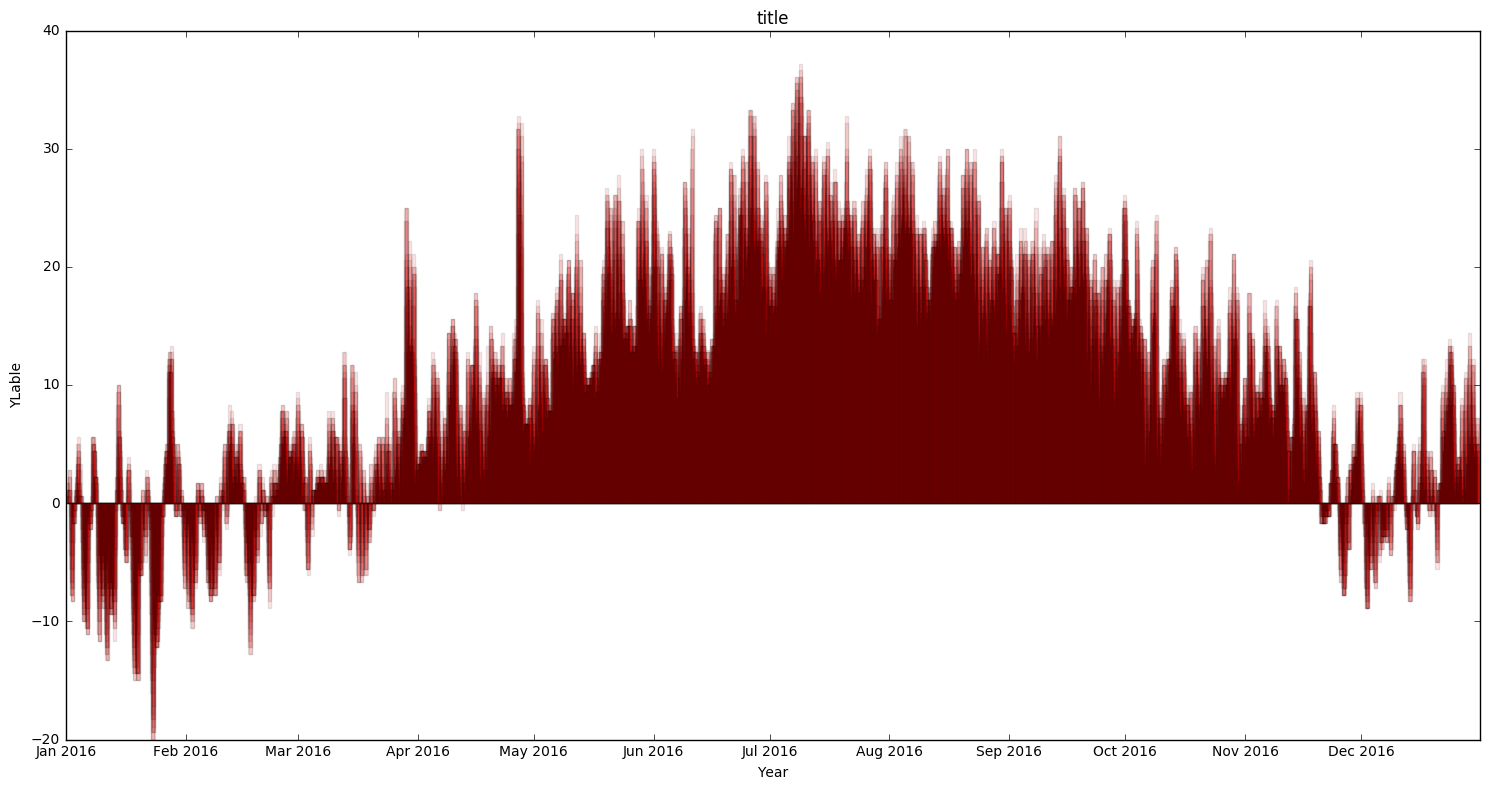

In [29]:
d1 = theDf["DB_temp"]
path = "img/barChartPlot"

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
VisBarPlotByAX(ax, d1, color="red")
plt.savefig(path)
plt.tight_layout()
plt.show()

In [31]:
def VisLinePlotByAX(ax, xData, color = "purple", title = 'title', YLable="YLable" , path="", axLine1 = 0, axLine2 = 0 ):
    yTime = pd.date_range('1/1/2016', periods=8760, freq='H')
    ax.plot(yTime,xData, alpha=0.5, color=color)
    ax.set_title(title)
    ax.set_xlabel('Year')
    ax.set_ylabel(YLable)
    ax.legend(loc='best')
    if(axLine1 != 0 and axLine2 != 0 ):
        ax.set_axhline(axLine1, color='r', label=r'True $\beta_1$')
        ax.set_axhline(axLine2, color='r', label=r'True $\beta_1$')
        ax.set_axhspan(axLine1, axLine2, facecolor='0.5', alpha=0.5,label=r'True $\beta_1$')


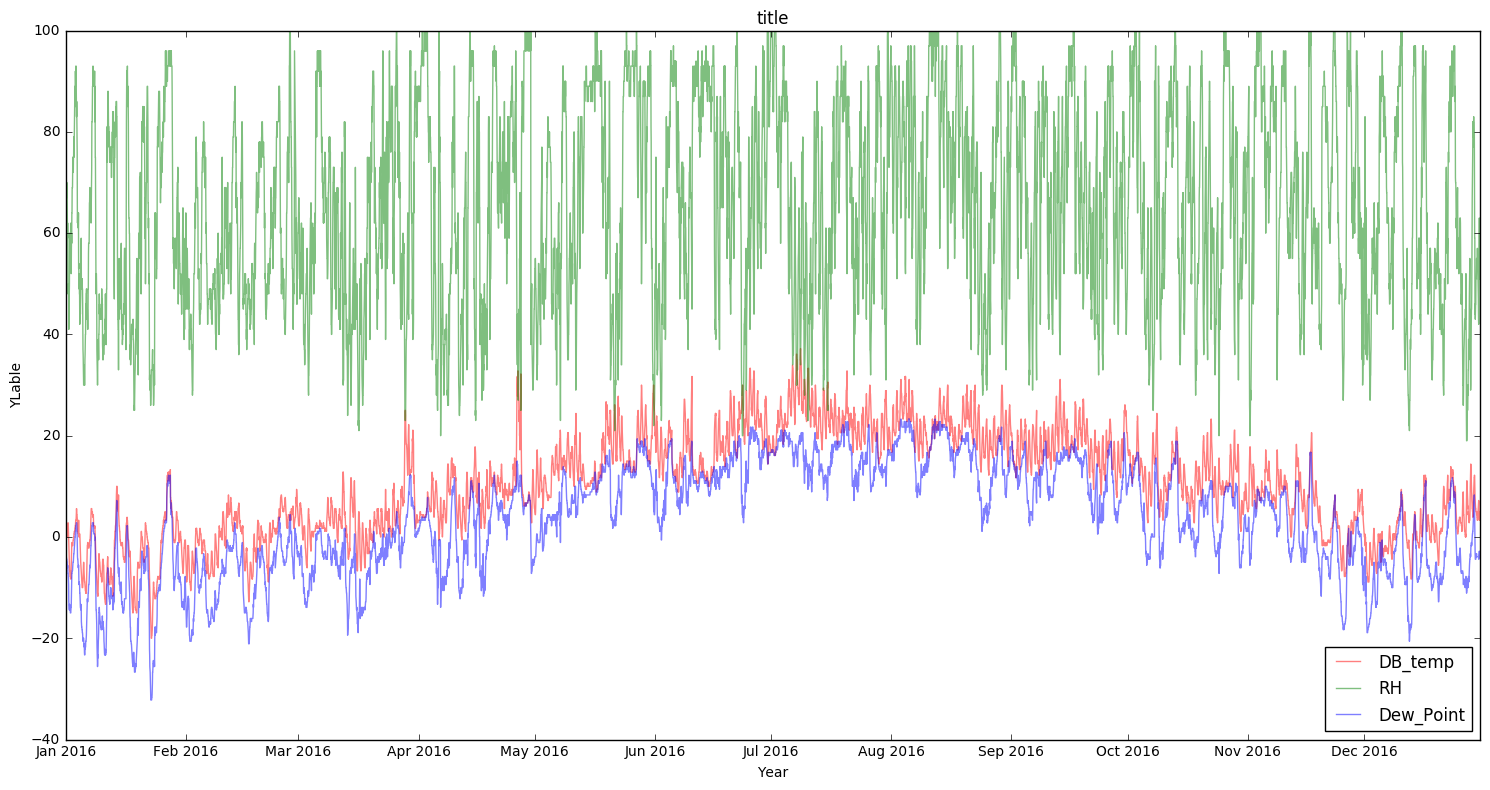

In [34]:
d1 = theDf["DB_temp"]
d2 = theDf["RH"]
d3 = theDf["Dew_Point"]
path = "img/multiPlot"

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
VisLinePlotByAX(ax, d1, color="red")
VisLinePlotByAX(ax, d2, color="green")
VisLinePlotByAX(ax, d3, color="blue")
plt.savefig(path)
plt.tight_layout()
plt.show()

In [35]:
def VisScatterPlotByAx(ax, xData, color = 'blue', title = 'title', YLable="YLable" , path="", axLine1 = 0, axLine2 = 0 ):
#     plt.figure(figsize=(20,10))
    yTime = pd.date_range('1/1/2016', periods=8760, freq='H')
    ax.scatter(yTime,xData, alpha=0.5, color=color)
    ax.set_title(title)
    ax.set_xlabel('Year')
    ax.set_ylabel(YLable)
    ax.legend(loc='best')
    if(axLine1 != 0 and axLine2 != 0 ):
        ax.axhline(axLine1, color='r', label=r'True $\beta_1$')
        ax.axhline(axLine2, color='r', label=r'True $\beta_1$')
        ax.axhspan(axLine1, axLine2, facecolor='0.5', alpha=0.5,label=r'True $\beta_1$')

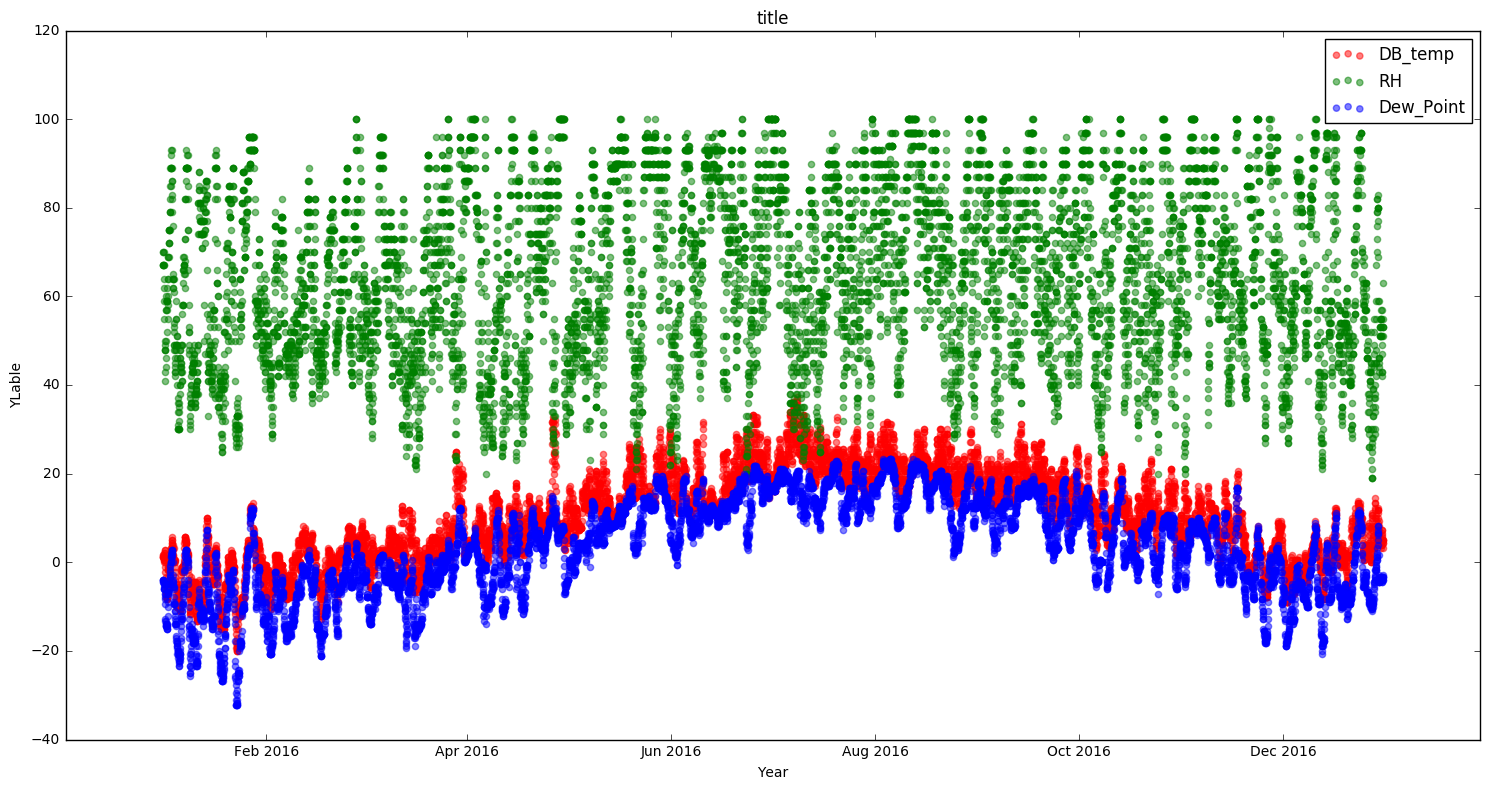

In [36]:
d1 = theDf["DB_temp"]
d2 = theDf["RH"]
d3 = theDf["Dew_Point"]
path = "img/multiScatterPlot"

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
VisScatterPlotByAx(ax, d1, color="red")
VisScatterPlotByAx(ax, d2, color="green")
VisScatterPlotByAx(ax, d3, color="blue")
plt.savefig(path)
plt.tight_layout()
plt.show()

In [2]:
10^10^10^1000000^10000

1008986

In [ ]:
10**10**100**100000